In [1]:
import os
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

os.getcwd()
filename = '/content/drive/MyDrive/smart/Combined_LabelledData_18_역률평균.json'
Testdata = pd.read_json(filename)
display(Testdata)

timelist=[]
Indexoftime={}
for i in range(len(Testdata.index)):
    timelist.append(Testdata.data[i]['TIMESTAMP'])
    Timenow=Testdata.data[i]['TIMESTAMP']
    if Timenow not in Indexoftime.keys():
        Indexoftime[Timenow]=[i]
    else :
        Indexoftime[Timenow].append(i) #TIMESTAMP 에 해당하는 행들을 집어넣음 예){6시:[1,2,3,4,5,6]}
timeset=set(timelist) #중복 제거
timelist=list(timeset)
timelist=sorted(timelist) #오름차순 정렬
print(Indexoftime)
#여기까진됨

Leftdic={}
for a in timelist: 
    Testdic={}
    #Testdic['TIMESTAMP']=a #DICTIONARY 내에 TIMESTAMP 만들기
    for i in Indexoftime[a]:
        key=Testdata.data[i]['ITEM_NAME']
        value=Testdata.data[i]['ITEM_VALUE'] #DICTIONARY 내에 ITEM 만들기
        Testdic[key]=value
        if 'LABEL_NAME' not in Testdic.keys():
            Testdic['LABEL_NAME']=Testdata.data[i]['LABEL_NAME'] #DICTIONARY 내에 LABEL_NAME 만들기 
    if not Leftdic :
        Leftdic['1']="hello"
        Leftdf=pd.DataFrame(Testdic,index=[a])
    else :
        Rightdf=pd.DataFrame(Testdic,index=[a])
        Leftdf=pd.concat([Leftdf,Rightdf],sort='False')

Leftdf

Mounted at /content/drive


,SVC_NAME,BASE_ITEM,DEVICE_ID,DEVICE_BD_ID,COMPANY_NAME,ESTABLISH_YEAR,LOCATION,COMPANY_TYPE,COMPANY_CAT,MAJOR_PRODUCT,CONTRACT_POWER,BILL_OPTION,KEPCO_INFO,facility_name,facility_type_name,facility_vendor,facility_year,facility_capacity,facility_volt,data
0,SOH,역률평균,1344,1,CO-295,1981,경북 고령군,제조,열처리,선박엔진,7000,산업용(을)고압A 선택II,05-****-****,KBV_1호기,공작기계,기아중공업,1999,88,220,"{'ITEM_NAME': '누적전력량', 'ITEM_VALUE': 838462, '..."
1,SOH,역률평균,1344,1,CO-295,1981,경북 고령군,제조,열처리,선박엔진,7000,산업용(을)고압A 선택II,05-****-****,KBV_1호기,공작기계,기아중공업,1999,88,220,"{'ITEM_NAME': '온도', 'ITEM_VALUE': 29.375, 'TIM..."
2,SOH,역률평균,1344,1,CO-295,1981,경북 고령군,제조,열처리,선박엔진,7000,산업용(을)고압A 선택II,05-****-****,KBV_1호기,공작기계,기아중공업,1999,88,220,"{'ITEM_NAME': '상전압평균', 'ITEM_VALUE': 124.25, '..."
3,SOH,역률평균,1344,1,CO-295,1981,경북 고령군,제조,열처리,선박엔진,7000,산업용(을)고압A 선택II,05-****-****,KBV_1호기,공작기계,기아중공업,1999,88,220,"{'ITEM_NAME': '선간전압평균', 'ITEM_VALUE': 215.417,..."
4,SOH,역률평균,1344,1,CO-295,1981,경북 고령군,제조,열처리,선박엔진,7000,산업용(을)고압A 선택II,05-****-****,KBV_1호기,공작기계,기아중공업,1999,88,220,"{'ITEM_NAME': '전압고조파평균', 'ITEM_VALUE': 5.339, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864795,SOH,역률평균,1344,1,CO-295,1981,경북 고령군,제조,열처리,선박엔진,7000,산업용(을)고압A 선택II,05-****-****,KBV_1호기,공작기계,기아중공업,1999,88,220,"{'ITEM_NAME': 'T상유효전력', 'ITEM_VALUE': 290.75, ..."
1864796,SOH,역률평균,1344,1,CO-295,1981,경북 고령군,제조,열처리,선박엔진,7000,산업용(을)고압A 선택II,05-****-****,KBV_1호기,공작기계,기아중공업,1999,88,220,"{'ITEM_NAME': 'T상무효전력', 'ITEM_VALUE': 456.75, ..."
1864797,SOH,역률평균,1344,1,CO-295,1981,경북 고령군,제조,열처리,선박엔진,7000,산업용(을)고압A 선택II,05-****-****,KBV_1호기,공작기계,기아중공업,1999,88,220,"{'ITEM_NAME': 'T상역률', 'ITEM_VALUE': 0.535156, ..."
1864798,SOH,역률평균,1344,1,CO-295,1981,경북 고령군,제조,열처리,선박엔진,7000,산업용(을)고압A 선택II,05-****-****,KBV_1호기,공작기계,기아중공업,1999,88,220,"{'ITEM_NAME': 'T상전압고조파', 'ITEM_VALUE': 6.25, '..."


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



,LABEL_NAME,R상무효전력,R상선간전압,R상역률,R상유효전력,R상전류,R상전류고조파,R상전압,R상전압고조파,S상무효전력,S상선간전압,S상역률,S상유효전력,S상전류,S상전류고조파,S상전압,S상전압고조파,T상무효전력,T상선간전압,T상역률,T상유효전력,T상전류,T상전류고조파,T상전압,T상전압고조파,누적전력량,무효전력평균,상전압평균,선간전압평균,역률평균,온도,유효전력평균,전류고조파평균,전류평균,전압고조파평균,주파수
2020-09-16 00:00:00,주의,236.00,123.75,0.855000,396.75,3.78100,10.644000,123.75,5.273000,263.50,124.50,0.598000,197.50,2.62500,29.395000,124.50,5.273000,443.25,124.50,0.563000,303.25,4.28100,20.020000,124.50,5.469000,838462.0000,942.75,124.250000,215.417000,0.676000,29.375,897.50,20.020000,3.563000,5.339000,59.835000
2020-09-16 00:01:00,주의,236.50,124.00,0.859000,397.75,3.71900,10.644000,124.00,5.371000,264.25,125.00,0.598000,197.50,2.59400,29.688000,125.00,5.469000,447.00,125.00,0.559000,302.75,4.34400,19.922000,125.00,5.566000,838476.0000,947.75,124.667000,216.083000,0.674000,28.750,898.00,20.085000,3.552000,5.469000,59.817000
2020-09-16 00:02:00,주의,237.25,124.00,0.859000,399.00,3.75000,10.449000,124.00,5.273000,264.00,125.00,0.598000,197.75,2.65600,29.297000,125.00,5.469000,446.00,125.00,0.563000,303.25,4.31300,19.824000,125.00,5.469000,838491.0000,947.00,124.500000,215.917000,0.675000,29.375,900.25,19.987000,3.563000,5.404000,59.826000
2020-09-16 00:03:00,주의,235.50,123.50,0.859000,396.50,3.75000,10.254000,123.50,5.078000,263.75,124.50,0.602000,199.50,2.65600,28.809000,124.50,5.273000,441.75,124.50,0.563000,301.75,4.28100,19.629000,124.50,5.273000,838506.0000,941.00,124.167000,215.250000,0.677000,29.375,897.75,19.564000,3.563000,5.208000,59.798000
2020-09-16 00:04:00,주의,237.50,124.00,0.855000,398.50,3.78100,10.352000,124.00,5.273000,262.50,125.00,0.598000,197.00,2.62500,29.297000,125.00,5.371000,447.25,124.75,0.559000,303.25,4.28100,19.824000,124.75,5.469000,838520.0000,947.25,124.583000,216.000000,0.674000,28.750,898.75,19.824000,3.563000,5.371000,59.854000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-22 23:55:56,주의,261.75,216.50,0.835938,399.25,3.81250,11.035156,125.00,6.347656,261.00,218.00,0.589844,191.00,2.56250,29.003906,125.75,6.542969,455.75,217.50,0.535156,290.75,4.31250,19.921875,125.75,6.445313,57462.6300,978.50,125.500000,217.333328,0.669112,17.500,881.00,19.986979,3.562500,6.445313,59.816770
2020-10-22 23:56:56,주의,260.25,216.00,0.835938,397.50,3.84375,11.035156,124.50,6.347656,260.75,217.75,0.585938,189.50,2.59375,28.417969,125.50,6.542969,452.75,217.50,0.539063,292.75,4.28125,19.921875,125.75,6.542969,57477.3800,973.75,125.250000,217.083328,0.670384,17.500,879.75,19.791666,3.572917,6.477865,59.816788
2020-10-22 23:57:56,주의,260.50,216.25,0.835938,399.75,3.81250,11.328125,124.75,6.738281,259.00,218.00,0.589844,189.75,2.56250,28.417969,125.50,6.933594,452.75,217.50,0.539063,292.25,4.31250,20.019531,125.75,6.835938,57491.8945,972.25,125.333336,217.250000,0.671791,17.500,881.75,19.921875,3.562500,6.835938,59.816770
2020-10-22 23:58:56,주의,262.75,217.25,0.835938,402.25,3.84375,10.839844,125.50,6.347656,264.50,218.75,0.582031,190.75,2.59375,28.417969,126.00,6.445313,456.75,218.25,0.535156,292.00,4.31250,20.019531,126.25,6.445313,57506.4900,984.00,125.916664,218.083328,0.668714,17.500,885.00,19.759115,3.583333,6.412760,59.835430


In [2]:
normal = Leftdf.reset_index(drop=True)

In [3]:
abc = normal[normal['LABEL_NAME'] == '경고'].index
normal = normal.drop(abc)

In [4]:
normal.drop(columns = ['LABEL_NAME'],inplace = True)

In [5]:
normal.reset_index(drop=True, inplace = True)

In [6]:
normal

,R상무효전력,R상선간전압,R상역률,R상유효전력,R상전류,R상전류고조파,R상전압,R상전압고조파,S상무효전력,S상선간전압,S상역률,S상유효전력,S상전류,S상전류고조파,S상전압,S상전압고조파,T상무효전력,T상선간전압,T상역률,T상유효전력,T상전류,T상전류고조파,T상전압,T상전압고조파,누적전력량,무효전력평균,상전압평균,선간전압평균,역률평균,온도,유효전력평균,전류고조파평균,전류평균,전압고조파평균,주파수
0,236.00,123.75,0.855000,396.75,3.78100,10.644000,123.75,5.273000,263.50,124.50,0.598000,197.50,2.62500,29.395000,124.50,5.273000,443.25,124.50,0.563000,303.25,4.28100,20.020000,124.50,5.469000,838462.0000,942.75,124.250000,215.417000,0.676000,29.375,897.50,20.020000,3.563000,5.339000,59.835000
1,236.50,124.00,0.859000,397.75,3.71900,10.644000,124.00,5.371000,264.25,125.00,0.598000,197.50,2.59400,29.688000,125.00,5.469000,447.00,125.00,0.559000,302.75,4.34400,19.922000,125.00,5.566000,838476.0000,947.75,124.667000,216.083000,0.674000,28.750,898.00,20.085000,3.552000,5.469000,59.817000
2,237.25,124.00,0.859000,399.00,3.75000,10.449000,124.00,5.273000,264.00,125.00,0.598000,197.75,2.65600,29.297000,125.00,5.469000,446.00,125.00,0.563000,303.25,4.31300,19.824000,125.00,5.469000,838491.0000,947.00,124.500000,215.917000,0.675000,29.375,900.25,19.987000,3.563000,5.404000,59.826000
3,235.50,123.50,0.859000,396.50,3.75000,10.254000,123.50,5.078000,263.75,124.50,0.602000,199.50,2.65600,28.809000,124.50,5.273000,441.75,124.50,0.563000,301.75,4.28100,19.629000,124.50,5.273000,838506.0000,941.00,124.167000,215.250000,0.677000,29.375,897.75,19.564000,3.563000,5.208000,59.798000
4,237.50,124.00,0.855000,398.50,3.78100,10.352000,124.00,5.273000,262.50,125.00,0.598000,197.00,2.62500,29.297000,125.00,5.371000,447.25,124.75,0.559000,303.25,4.28100,19.824000,124.75,5.469000,838520.0000,947.25,124.583000,216.000000,0.674000,28.750,898.75,19.824000,3.563000,5.371000,59.854000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49948,261.75,216.50,0.835938,399.25,3.81250,11.035156,125.00,6.347656,261.00,218.00,0.589844,191.00,2.56250,29.003906,125.75,6.542969,455.75,217.50,0.535156,290.75,4.31250,19.921875,125.75,6.445313,57462.6300,978.50,125.500000,217.333328,0.669112,17.500,881.00,19.986979,3.562500,6.445313,59.816770
49949,260.25,216.00,0.835938,397.50,3.84375,11.035156,124.50,6.347656,260.75,217.75,0.585938,189.50,2.59375,28.417969,125.50,6.542969,452.75,217.50,0.539063,292.75,4.28125,19.921875,125.75,6.542969,57477.3800,973.75,125.250000,217.083328,0.670384,17.500,879.75,19.791666,3.572917,6.477865,59.816788
49950,260.50,216.25,0.835938,399.75,3.81250,11.328125,124.75,6.738281,259.00,218.00,0.589844,189.75,2.56250,28.417969,125.50,6.933594,452.75,217.50,0.539063,292.25,4.31250,20.019531,125.75,6.835938,57491.8945,972.25,125.333336,217.250000,0.671791,17.500,881.75,19.921875,3.562500,6.835938,59.816770
49951,262.75,217.25,0.835938,402.25,3.84375,10.839844,125.50,6.347656,264.50,218.75,0.582031,190.75,2.59375,28.417969,126.00,6.445313,456.75,218.25,0.535156,292.00,4.31250,20.019531,126.25,6.445313,57506.4900,984.00,125.916664,218.083328,0.668714,17.500,885.00,19.759115,3.583333,6.412760,59.835430


In [7]:
attack = Leftdf.reset_index(drop=True)

In [8]:
attack

,LABEL_NAME,R상무효전력,R상선간전압,R상역률,R상유효전력,R상전류,R상전류고조파,R상전압,R상전압고조파,S상무효전력,S상선간전압,S상역률,S상유효전력,S상전류,S상전류고조파,S상전압,S상전압고조파,T상무효전력,T상선간전압,T상역률,T상유효전력,T상전류,T상전류고조파,T상전압,T상전압고조파,누적전력량,무효전력평균,상전압평균,선간전압평균,역률평균,온도,유효전력평균,전류고조파평균,전류평균,전압고조파평균,주파수
0,주의,236.00,123.75,0.855000,396.75,3.78100,10.644000,123.75,5.273000,263.50,124.50,0.598000,197.50,2.62500,29.395000,124.50,5.273000,443.25,124.50,0.563000,303.25,4.28100,20.020000,124.50,5.469000,838462.0000,942.75,124.250000,215.417000,0.676000,29.375,897.50,20.020000,3.563000,5.339000,59.835000
1,주의,236.50,124.00,0.859000,397.75,3.71900,10.644000,124.00,5.371000,264.25,125.00,0.598000,197.50,2.59400,29.688000,125.00,5.469000,447.00,125.00,0.559000,302.75,4.34400,19.922000,125.00,5.566000,838476.0000,947.75,124.667000,216.083000,0.674000,28.750,898.00,20.085000,3.552000,5.469000,59.817000
2,주의,237.25,124.00,0.859000,399.00,3.75000,10.449000,124.00,5.273000,264.00,125.00,0.598000,197.75,2.65600,29.297000,125.00,5.469000,446.00,125.00,0.563000,303.25,4.31300,19.824000,125.00,5.469000,838491.0000,947.00,124.500000,215.917000,0.675000,29.375,900.25,19.987000,3.563000,5.404000,59.826000
3,주의,235.50,123.50,0.859000,396.50,3.75000,10.254000,123.50,5.078000,263.75,124.50,0.602000,199.50,2.65600,28.809000,124.50,5.273000,441.75,124.50,0.563000,301.75,4.28100,19.629000,124.50,5.273000,838506.0000,941.00,124.167000,215.250000,0.677000,29.375,897.75,19.564000,3.563000,5.208000,59.798000
4,주의,237.50,124.00,0.855000,398.50,3.78100,10.352000,124.00,5.273000,262.50,125.00,0.598000,197.00,2.62500,29.297000,125.00,5.371000,447.25,124.75,0.559000,303.25,4.28100,19.824000,124.75,5.469000,838520.0000,947.25,124.583000,216.000000,0.674000,28.750,898.75,19.824000,3.563000,5.371000,59.854000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53275,주의,261.75,216.50,0.835938,399.25,3.81250,11.035156,125.00,6.347656,261.00,218.00,0.589844,191.00,2.56250,29.003906,125.75,6.542969,455.75,217.50,0.535156,290.75,4.31250,19.921875,125.75,6.445313,57462.6300,978.50,125.500000,217.333328,0.669112,17.500,881.00,19.986979,3.562500,6.445313,59.816770
53276,주의,260.25,216.00,0.835938,397.50,3.84375,11.035156,124.50,6.347656,260.75,217.75,0.585938,189.50,2.59375,28.417969,125.50,6.542969,452.75,217.50,0.539063,292.75,4.28125,19.921875,125.75,6.542969,57477.3800,973.75,125.250000,217.083328,0.670384,17.500,879.75,19.791666,3.572917,6.477865,59.816788
53277,주의,260.50,216.25,0.835938,399.75,3.81250,11.328125,124.75,6.738281,259.00,218.00,0.589844,189.75,2.56250,28.417969,125.50,6.933594,452.75,217.50,0.539063,292.25,4.31250,20.019531,125.75,6.835938,57491.8945,972.25,125.333336,217.250000,0.671791,17.500,881.75,19.921875,3.562500,6.835938,59.816770
53278,주의,262.75,217.25,0.835938,402.25,3.84375,10.839844,125.50,6.347656,264.50,218.75,0.582031,190.75,2.59375,28.417969,126.00,6.445313,456.75,218.25,0.535156,292.00,4.31250,20.019531,126.25,6.445313,57506.4900,984.00,125.916664,218.083328,0.668714,17.500,885.00,19.759115,3.583333,6.412760,59.835430


In [9]:
attack = attack.sample(n=49953)

In [10]:
attack = attack.sort_index()

In [11]:
attack.reset_index(drop=True, inplace = True)

In [12]:
attack.drop(columns = ['LABEL_NAME'],inplace = True)

In [13]:
attack

,R상무효전력,R상선간전압,R상역률,R상유효전력,R상전류,R상전류고조파,R상전압,R상전압고조파,S상무효전력,S상선간전압,S상역률,S상유효전력,S상전류,S상전류고조파,S상전압,S상전압고조파,T상무효전력,T상선간전압,T상역률,T상유효전력,T상전류,T상전류고조파,T상전압,T상전압고조파,누적전력량,무효전력평균,상전압평균,선간전압평균,역률평균,온도,유효전력평균,전류고조파평균,전류평균,전압고조파평균,주파수
0,236.00,123.75,0.855000,396.75,3.78100,10.644000,123.75,5.273000,263.50,124.50,0.598000,197.50,2.62500,29.395000,124.50,5.273000,443.25,124.50,0.563000,303.25,4.28100,20.020000,124.50,5.469000,838462.0000,942.75,124.250000,215.417000,0.676000,29.375,897.50,20.020000,3.563000,5.339000,59.835000
1,236.50,124.00,0.859000,397.75,3.71900,10.644000,124.00,5.371000,264.25,125.00,0.598000,197.50,2.59400,29.688000,125.00,5.469000,447.00,125.00,0.559000,302.75,4.34400,19.922000,125.00,5.566000,838476.0000,947.75,124.667000,216.083000,0.674000,28.750,898.00,20.085000,3.552000,5.469000,59.817000
2,237.25,124.00,0.859000,399.00,3.75000,10.449000,124.00,5.273000,264.00,125.00,0.598000,197.75,2.65600,29.297000,125.00,5.469000,446.00,125.00,0.563000,303.25,4.31300,19.824000,125.00,5.469000,838491.0000,947.00,124.500000,215.917000,0.675000,29.375,900.25,19.987000,3.563000,5.404000,59.826000
3,235.50,123.50,0.859000,396.50,3.75000,10.254000,123.50,5.078000,263.75,124.50,0.602000,199.50,2.65600,28.809000,124.50,5.273000,441.75,124.50,0.563000,301.75,4.28100,19.629000,124.50,5.273000,838506.0000,941.00,124.167000,215.250000,0.677000,29.375,897.75,19.564000,3.563000,5.208000,59.798000
4,237.50,124.00,0.855000,398.50,3.78100,10.352000,124.00,5.273000,262.50,125.00,0.598000,197.00,2.62500,29.297000,125.00,5.371000,447.25,124.75,0.559000,303.25,4.28100,19.824000,124.75,5.469000,838520.0000,947.25,124.583000,216.000000,0.674000,28.750,898.75,19.824000,3.563000,5.371000,59.854000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49948,261.75,216.50,0.835938,399.25,3.81250,11.035156,125.00,6.347656,261.00,218.00,0.589844,191.00,2.56250,29.003906,125.75,6.542969,455.75,217.50,0.535156,290.75,4.31250,19.921875,125.75,6.445313,57462.6300,978.50,125.500000,217.333328,0.669112,17.500,881.00,19.986979,3.562500,6.445313,59.816770
49949,260.25,216.00,0.835938,397.50,3.84375,11.035156,124.50,6.347656,260.75,217.75,0.585938,189.50,2.59375,28.417969,125.50,6.542969,452.75,217.50,0.539063,292.75,4.28125,19.921875,125.75,6.542969,57477.3800,973.75,125.250000,217.083328,0.670384,17.500,879.75,19.791666,3.572917,6.477865,59.816788
49950,260.50,216.25,0.835938,399.75,3.81250,11.328125,124.75,6.738281,259.00,218.00,0.589844,189.75,2.56250,28.417969,125.50,6.933594,452.75,217.50,0.539063,292.25,4.31250,20.019531,125.75,6.835938,57491.8945,972.25,125.333336,217.250000,0.671791,17.500,881.75,19.921875,3.562500,6.835938,59.816770
49951,262.75,217.25,0.835938,402.25,3.84375,10.839844,125.50,6.347656,264.50,218.75,0.582031,190.75,2.59375,28.417969,126.00,6.445313,456.75,218.25,0.535156,292.00,4.31250,20.019531,126.25,6.445313,57506.4900,984.00,125.916664,218.083328,0.668714,17.500,885.00,19.759115,3.583333,6.412760,59.835430


In [14]:
normal.astype(float)

,R상무효전력,R상선간전압,R상역률,R상유효전력,R상전류,R상전류고조파,R상전압,R상전압고조파,S상무효전력,S상선간전압,S상역률,S상유효전력,S상전류,S상전류고조파,S상전압,S상전압고조파,T상무효전력,T상선간전압,T상역률,T상유효전력,T상전류,T상전류고조파,T상전압,T상전압고조파,누적전력량,무효전력평균,상전압평균,선간전압평균,역률평균,온도,유효전력평균,전류고조파평균,전류평균,전압고조파평균,주파수
0,236.00,123.75,0.855000,396.75,3.78100,10.644000,123.75,5.273000,263.50,124.50,0.598000,197.50,2.62500,29.395000,124.50,5.273000,443.25,124.50,0.563000,303.25,4.28100,20.020000,124.50,5.469000,838462.0000,942.75,124.250000,215.417000,0.676000,29.375,897.50,20.020000,3.563000,5.339000,59.835000
1,236.50,124.00,0.859000,397.75,3.71900,10.644000,124.00,5.371000,264.25,125.00,0.598000,197.50,2.59400,29.688000,125.00,5.469000,447.00,125.00,0.559000,302.75,4.34400,19.922000,125.00,5.566000,838476.0000,947.75,124.667000,216.083000,0.674000,28.750,898.00,20.085000,3.552000,5.469000,59.817000
2,237.25,124.00,0.859000,399.00,3.75000,10.449000,124.00,5.273000,264.00,125.00,0.598000,197.75,2.65600,29.297000,125.00,5.469000,446.00,125.00,0.563000,303.25,4.31300,19.824000,125.00,5.469000,838491.0000,947.00,124.500000,215.917000,0.675000,29.375,900.25,19.987000,3.563000,5.404000,59.826000
3,235.50,123.50,0.859000,396.50,3.75000,10.254000,123.50,5.078000,263.75,124.50,0.602000,199.50,2.65600,28.809000,124.50,5.273000,441.75,124.50,0.563000,301.75,4.28100,19.629000,124.50,5.273000,838506.0000,941.00,124.167000,215.250000,0.677000,29.375,897.75,19.564000,3.563000,5.208000,59.798000
4,237.50,124.00,0.855000,398.50,3.78100,10.352000,124.00,5.273000,262.50,125.00,0.598000,197.00,2.62500,29.297000,125.00,5.371000,447.25,124.75,0.559000,303.25,4.28100,19.824000,124.75,5.469000,838520.0000,947.25,124.583000,216.000000,0.674000,28.750,898.75,19.824000,3.563000,5.371000,59.854000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49948,261.75,216.50,0.835938,399.25,3.81250,11.035156,125.00,6.347656,261.00,218.00,0.589844,191.00,2.56250,29.003906,125.75,6.542969,455.75,217.50,0.535156,290.75,4.31250,19.921875,125.75,6.445313,57462.6300,978.50,125.500000,217.333328,0.669112,17.500,881.00,19.986979,3.562500,6.445313,59.816770
49949,260.25,216.00,0.835938,397.50,3.84375,11.035156,124.50,6.347656,260.75,217.75,0.585938,189.50,2.59375,28.417969,125.50,6.542969,452.75,217.50,0.539063,292.75,4.28125,19.921875,125.75,6.542969,57477.3800,973.75,125.250000,217.083328,0.670384,17.500,879.75,19.791666,3.572917,6.477865,59.816788
49950,260.50,216.25,0.835938,399.75,3.81250,11.328125,124.75,6.738281,259.00,218.00,0.589844,189.75,2.56250,28.417969,125.50,6.933594,452.75,217.50,0.539063,292.25,4.31250,20.019531,125.75,6.835938,57491.8945,972.25,125.333336,217.250000,0.671791,17.500,881.75,19.921875,3.562500,6.835938,59.816770
49951,262.75,217.25,0.835938,402.25,3.84375,10.839844,125.50,6.347656,264.50,218.75,0.582031,190.75,2.59375,28.417969,126.00,6.445313,456.75,218.25,0.535156,292.00,4.31250,20.019531,126.25,6.445313,57506.4900,984.00,125.916664,218.083328,0.668714,17.500,885.00,19.759115,3.583333,6.412760,59.835430


In [15]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

x = normal.values
x_scaled = min_max_scaler.fit_transform(x)
normal = pd.DataFrame(x_scaled)

In [16]:
normal

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
0,0.012294,0.062657,0.906928,0.205891,0.003349,0.201096,0.675676,0.771358,0.056955,0.059850,0.809639,0.220115,0.028996,0.513656,0.666667,0.692267,0.090469,0.064838,0.732460,0.189793,0.001990,0.212625,0.666667,0.736863,0.557534,0.031818,0.666703,0.671815,0.723714,0.722222,0.205137,0.284221,0.002159,0.727386,0.495751
1,0.012417,0.065163,0.909727,0.205973,0.002684,0.201096,0.702703,0.785693,0.057117,0.064838,0.809639,0.220115,0.028653,0.518776,0.722222,0.717999,0.091285,0.069825,0.729375,0.189751,0.002660,0.211249,0.717949,0.749933,0.557543,0.032203,0.711784,0.712800,0.721477,0.694444,0.205151,0.285328,0.002039,0.747556,0.444759
2,0.012600,0.065163,0.909727,0.206076,0.003016,0.197412,0.702703,0.771358,0.057063,0.064838,0.809639,0.220137,0.029338,0.511944,0.722222,0.717999,0.091067,0.069825,0.732460,0.189793,0.002331,0.209872,0.717949,0.736863,0.557553,0.032145,0.693730,0.702585,0.722595,0.722222,0.205215,0.283660,0.002159,0.737471,0.470255
3,0.012172,0.060150,0.909727,0.205870,0.003016,0.193728,0.648649,0.742832,0.057009,0.059850,0.812048,0.220288,0.029338,0.503416,0.666667,0.692267,0.090143,0.064838,0.732460,0.189667,0.001990,0.207133,0.666667,0.710455,0.557563,0.031683,0.657730,0.661538,0.724832,0.722222,0.205144,0.276461,0.002159,0.707060,0.390935
4,0.012661,0.065163,0.906928,0.206035,0.003349,0.195579,0.702703,0.771358,0.056738,0.064838,0.809639,0.220072,0.028996,0.511944,0.722222,0.705133,0.091339,0.067332,0.729375,0.189793,0.001990,0.209872,0.692308,0.736863,0.557572,0.032164,0.702703,0.707692,0.721477,0.694444,0.205172,0.280886,0.002159,0.732351,0.549575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49948,0.018594,0.992481,0.893589,0.206097,0.003687,0.208486,0.810811,0.928563,0.056414,0.992519,0.804725,0.219552,0.028305,0.506822,0.805556,0.858996,0.093188,0.992519,0.710992,0.188740,0.002325,0.211247,0.794872,0.868406,0.038205,0.034569,0.801838,0.789743,0.716009,0.194444,0.204673,0.283659,0.002154,0.899040,0.444108
49949,0.018227,0.987469,0.893589,0.205953,0.004023,0.208486,0.756757,0.928563,0.056360,0.990025,0.802372,0.219422,0.028650,0.496583,0.777778,0.858996,0.092535,0.992519,0.714004,0.188909,0.001993,0.211247,0.794872,0.881564,0.038215,0.034203,0.774811,0.774359,0.717432,0.194444,0.204638,0.280335,0.002267,0.904091,0.444159
49950,0.018289,0.989975,0.893589,0.206138,0.003687,0.214021,0.783784,0.985705,0.055982,0.992519,0.804725,0.219444,0.028305,0.496583,0.777778,0.910279,0.092535,0.992519,0.714004,0.188866,0.002325,0.212619,0.794872,0.921037,0.038224,0.034088,0.783820,0.784615,0.719006,0.194444,0.204694,0.282551,0.002154,0.959649,0.444108
49951,0.018839,1.000000,0.893589,0.206344,0.004023,0.204796,0.864865,0.928563,0.057171,1.000000,0.800019,0.219531,0.028650,0.496583,0.833333,0.846175,0.093405,1.000000,0.710992,0.188845,0.002325,0.212619,0.846154,0.868406,0.038234,0.034992,0.846883,0.835897,0.715564,0.194444,0.204786,0.279781,0.002381,0.893989,0.496969


In [17]:
attack.astype(float)

,R상무효전력,R상선간전압,R상역률,R상유효전력,R상전류,R상전류고조파,R상전압,R상전압고조파,S상무효전력,S상선간전압,S상역률,S상유효전력,S상전류,S상전류고조파,S상전압,S상전압고조파,T상무효전력,T상선간전압,T상역률,T상유효전력,T상전류,T상전류고조파,T상전압,T상전압고조파,누적전력량,무효전력평균,상전압평균,선간전압평균,역률평균,온도,유효전력평균,전류고조파평균,전류평균,전압고조파평균,주파수
0,236.00,123.75,0.855000,396.75,3.78100,10.644000,123.75,5.273000,263.50,124.50,0.598000,197.50,2.62500,29.395000,124.50,5.273000,443.25,124.50,0.563000,303.25,4.28100,20.020000,124.50,5.469000,838462.0000,942.75,124.250000,215.417000,0.676000,29.375,897.50,20.020000,3.563000,5.339000,59.835000
1,236.50,124.00,0.859000,397.75,3.71900,10.644000,124.00,5.371000,264.25,125.00,0.598000,197.50,2.59400,29.688000,125.00,5.469000,447.00,125.00,0.559000,302.75,4.34400,19.922000,125.00,5.566000,838476.0000,947.75,124.667000,216.083000,0.674000,28.750,898.00,20.085000,3.552000,5.469000,59.817000
2,237.25,124.00,0.859000,399.00,3.75000,10.449000,124.00,5.273000,264.00,125.00,0.598000,197.75,2.65600,29.297000,125.00,5.469000,446.00,125.00,0.563000,303.25,4.31300,19.824000,125.00,5.469000,838491.0000,947.00,124.500000,215.917000,0.675000,29.375,900.25,19.987000,3.563000,5.404000,59.826000
3,235.50,123.50,0.859000,396.50,3.75000,10.254000,123.50,5.078000,263.75,124.50,0.602000,199.50,2.65600,28.809000,124.50,5.273000,441.75,124.50,0.563000,301.75,4.28100,19.629000,124.50,5.273000,838506.0000,941.00,124.167000,215.250000,0.677000,29.375,897.75,19.564000,3.563000,5.208000,59.798000
4,237.50,124.00,0.855000,398.50,3.78100,10.352000,124.00,5.273000,262.50,125.00,0.598000,197.00,2.62500,29.297000,125.00,5.371000,447.25,124.75,0.559000,303.25,4.28100,19.824000,124.75,5.469000,838520.0000,947.25,124.583000,216.000000,0.674000,28.750,898.75,19.824000,3.563000,5.371000,59.854000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49948,261.75,216.50,0.835938,399.25,3.81250,11.035156,125.00,6.347656,261.00,218.00,0.589844,191.00,2.56250,29.003906,125.75,6.542969,455.75,217.50,0.535156,290.75,4.31250,19.921875,125.75,6.445313,57462.6300,978.50,125.500000,217.333328,0.669112,17.500,881.00,19.986979,3.562500,6.445313,59.816770
49949,260.25,216.00,0.835938,397.50,3.84375,11.035156,124.50,6.347656,260.75,217.75,0.585938,189.50,2.59375,28.417969,125.50,6.542969,452.75,217.50,0.539063,292.75,4.28125,19.921875,125.75,6.542969,57477.3800,973.75,125.250000,217.083328,0.670384,17.500,879.75,19.791666,3.572917,6.477865,59.816788
49950,260.50,216.25,0.835938,399.75,3.81250,11.328125,124.75,6.738281,259.00,218.00,0.589844,189.75,2.56250,28.417969,125.50,6.933594,452.75,217.50,0.539063,292.25,4.31250,20.019531,125.75,6.835938,57491.8945,972.25,125.333336,217.250000,0.671791,17.500,881.75,19.921875,3.562500,6.835938,59.816770
49951,262.75,217.25,0.835938,402.25,3.84375,10.839844,125.50,6.347656,264.50,218.75,0.582031,190.75,2.59375,28.417969,126.00,6.445313,456.75,218.25,0.535156,292.00,4.31250,20.019531,126.25,6.445313,57506.4900,984.00,125.916664,218.083328,0.668714,17.500,885.00,19.759115,3.583333,6.412760,59.835430


In [18]:
from sklearn import preprocessing

x = attack.values 
x_scaled = min_max_scaler.transform(x)
attack = pd.DataFrame(x_scaled)

In [19]:
window_size=12

In [20]:
windows_normal=normal.values[np.arange(window_size)[None, :] + np.arange(normal.shape[0]-window_size)[:, None]]
windows_normal.shape

(49941, 12, 35)

In [21]:
windows_attack=attack.values[np.arange(window_size)[None, :] + np.arange(attack.shape[0]-window_size)[:, None]]
windows_attack.shape

(49941, 12, 35)

In [23]:
#utils

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch

from sklearn.metrics import roc_curve,roc_auc_score

def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)
    
def plot_history(history):
    losses1 = [x['val_loss1'] for x in history]
    losses2 = [x['val_loss2'] for x in history]
    plt.plot(losses1, '-x', label="loss1")
    plt.plot(losses2, '-x', label="loss2")
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()
    plt.title('Losses vs. No. of epochs')
    plt.grid()
    plt.show()
    
def histogram(y_test,y_pred):
    plt.figure(figsize=(12,6))
    plt.hist([y_pred[y_test==0],
              y_pred[y_test==1]],
            bins=20,
            color = ['#82E0AA','#EC7063'],stacked=True)
    plt.title("Results",size=20)
    plt.grid()
    plt.show()
    
def ROC(y_test,y_pred):
    fpr,tpr,tr=roc_curve(y_test,y_pred)
    auc=roc_auc_score(y_test,y_pred)
    idx=np.argwhere(np.diff(np.sign(tpr-(1-fpr)))).flatten()

    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.plot(fpr,tpr,label="AUC="+str(auc))
    plt.plot(fpr,1-fpr,'r:')
    plt.plot(fpr[idx],tpr[idx], 'ro')
    plt.legend(loc=4)
    plt.grid()
    plt.show()
    return tr[idx]
    
def confusion_matrix(target, predicted, perc=False):

    data = {'y_Actual':    target,
            'y_Predicted': predicted
            }
    df = pd.DataFrame(data, columns=['y_Predicted','y_Actual'])
    confusion_matrix = pd.crosstab(df['y_Predicted'], df['y_Actual'], rownames=['Predicted'], colnames=['Actual'])
    
    if perc:
        sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True, fmt='.2%', cmap='Blues')
    else:
        sns.heatmap(confusion_matrix, annot=True, fmt='d')
    plt.show()

In [24]:
# USAD
!pip install utils
import torch
import torch.nn as nn

from utils import *
device = get_default_device()

class Encoder(nn.Module):
  def __init__(self, in_size, latent_size):
    super().__init__()
    self.linear1 = nn.Linear(in_size, int(in_size/2))
    self.linear2 = nn.Linear(int(in_size/2), int(in_size/4))
    self.linear3 = nn.Linear(int(in_size/4), latent_size)
    self.relu = nn.ReLU(True)
        
  def forward(self, w):
    out = self.linear1(w)
    out = self.relu(out)
    out = self.linear2(out)
    out = self.relu(out)
    out = self.linear3(out)
    z = self.relu(out)
    return z
    
class Decoder(nn.Module):
  def __init__(self, latent_size, out_size):
    super().__init__()
    self.linear1 = nn.Linear(latent_size, int(out_size/4))
    self.linear2 = nn.Linear(int(out_size/4), int(out_size/2))
    self.linear3 = nn.Linear(int(out_size/2), out_size)
    self.relu = nn.ReLU(True)
    self.sigmoid = nn.Sigmoid()
        
  def forward(self, z):
    out = self.linear1(z)
    out = self.relu(out)
    out = self.linear2(out)
    out = self.relu(out)
    out = self.linear3(out)
    w = self.sigmoid(out)
    return w
    
class UsadModel(nn.Module):
  def __init__(self, w_size, z_size):
    super().__init__()
    self.encoder = Encoder(w_size, z_size)
    self.decoder1 = Decoder(z_size, w_size)
    self.decoder2 = Decoder(z_size, w_size)
  
  def training_step(self, batch, n):
    z = self.encoder(batch)
    w1 = self.decoder1(z)
    w2 = self.decoder2(z)
    w3 = self.decoder2(self.encoder(w1))
    loss1 = 1/n*torch.mean((batch-w1)**2)+(1-1/n)*torch.mean((batch-w3)**2)
    loss2 = 1/n*torch.mean((batch-w2)**2)-(1-1/n)*torch.mean((batch-w3)**2)
    return loss1,loss2

  def validation_step(self, batch, n):
    z = self.encoder(batch)
    w1 = self.decoder1(z)
    w2 = self.decoder2(z)
    w3 = self.decoder2(self.encoder(w1))
    loss1 = 1/n*torch.mean((batch-w1)**2)+(1-1/n)*torch.mean((batch-w3)**2)
    loss2 = 1/n*torch.mean((batch-w2)**2)-(1-1/n)*torch.mean((batch-w3)**2)
    return {'val_loss1': loss1, 'val_loss2': loss2}
        
  def validation_epoch_end(self, outputs):
    batch_losses1 = [x['val_loss1'] for x in outputs]
    epoch_loss1 = torch.stack(batch_losses1).mean()
    batch_losses2 = [x['val_loss2'] for x in outputs]
    epoch_loss2 = torch.stack(batch_losses2).mean()
    return {'val_loss1': epoch_loss1.item(), 'val_loss2': epoch_loss2.item()}
    
  def epoch_end(self, epoch, result):
    print("Epoch [{}], val_loss1: {:.4f}, val_loss2: {:.4f}".format(epoch, result['val_loss1'], result['val_loss2']))
    
def evaluate(model, val_loader, n):
    outputs = [model.validation_step(to_device(batch,device), n) for [batch] in val_loader]
    return model.validation_epoch_end(outputs)

def training(epochs, model, train_loader, val_loader, opt_func=torch.optim.Adam):
    history = []
    optimizer1 = opt_func(list(model.encoder.parameters())+list(model.decoder1.parameters()))
    optimizer2 = opt_func(list(model.encoder.parameters())+list(model.decoder2.parameters()))
    for epoch in range(epochs):
        for [batch] in train_loader:
            batch=to_device(batch,device)
            
            #Train AE1
            loss1,loss2 = model.training_step(batch,epoch+1)
            loss1.backward()
            optimizer1.step()
            optimizer1.zero_grad()
            
            
            #Train AE2
            loss1,loss2 = model.training_step(batch,epoch+1)
            loss2.backward()
            optimizer2.step()
            optimizer2.zero_grad()
            
            
        result = evaluate(model, val_loader, epoch+1)
        model.epoch_end(epoch, result)
        history.append(result)
    return history
    
def testing(model, test_loader, alpha=.5, beta=.5):
    results=[]
    for [batch] in test_loader:
        batch=to_device(batch,device)
        w1=model.decoder1(model.encoder(batch))
        w2=model.decoder2(model.encoder(w1))
        results.append(alpha*torch.mean((batch-w1)**2,axis=1)+beta*torch.mean((batch-w2)**2,axis=1))
    return results

In [25]:
import torch.utils.data as data_utils

BATCH_SIZE =  1000
N_EPOCHS = 100
hidden_size = 100

w_size=windows_normal.shape[1]*windows_normal.shape[2]
z_size=windows_normal.shape[1]*hidden_size

windows_normal_train = windows_normal[:int(np.floor(.8 *  windows_normal.shape[0]))]
windows_normal_val = windows_normal[int(np.floor(.8 *  windows_normal.shape[0])):int(np.floor(windows_normal.shape[0]))]

train_loader = torch.utils.data.DataLoader(data_utils.TensorDataset(
    torch.from_numpy(windows_normal_train).float().view(([windows_normal_train.shape[0],w_size]))
) , batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

val_loader = torch.utils.data.DataLoader(data_utils.TensorDataset(
    torch.from_numpy(windows_normal_val).float().view(([windows_normal_val.shape[0],w_size]))
) , batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

test_loader = torch.utils.data.DataLoader(data_utils.TensorDataset(
    torch.from_numpy(windows_attack).float().view(([windows_attack.shape[0],w_size]))
) , batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

model = UsadModel(w_size, z_size)
model = to_device(model,device)

In [26]:
history = training(N_EPOCHS,model,train_loader,val_loader)

Epoch [0], val_loss1: 0.0183, val_loss2: 0.0187
Epoch [1], val_loss1: 0.0178, val_loss2: -0.0009
Epoch [2], val_loss1: 0.0332, val_loss2: -0.0140
Epoch [3], val_loss1: 0.0244, val_loss2: -0.0135
Epoch [4], val_loss1: 0.0213, val_loss2: -0.0135
Epoch [5], val_loss1: 0.0194, val_loss2: -0.0134
Epoch [6], val_loss1: 0.0210, val_loss2: -0.0156
Epoch [7], val_loss1: 0.0210, val_loss2: -0.0163
Epoch [8], val_loss1: 0.0218, val_loss2: -0.0175
Epoch [9], val_loss1: 0.0206, val_loss2: -0.0169
Epoch [10], val_loss1: 0.0209, val_loss2: -0.0174
Epoch [11], val_loss1: 0.0226, val_loss2: -0.0193
Epoch [12], val_loss1: 0.0212, val_loss2: -0.0182
Epoch [13], val_loss1: 0.0204, val_loss2: -0.0177
Epoch [14], val_loss1: 0.0221, val_loss2: -0.0194
Epoch [15], val_loss1: 0.0217, val_loss2: -0.0192
Epoch [16], val_loss1: 0.0206, val_loss2: -0.0184
Epoch [17], val_loss1: 0.0204, val_loss2: -0.0183
Epoch [18], val_loss1: 0.0222, val_loss2: -0.0201
Epoch [19], val_loss1: 0.0199, val_loss2: -0.0180
Epoch [20],

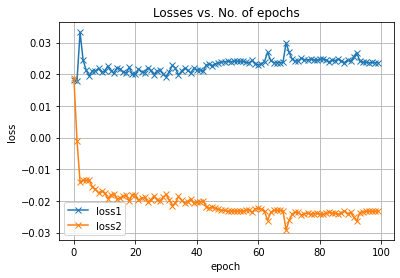

In [27]:
plot_history(history)

In [28]:
torch.save({
            'encoder': model.encoder.state_dict(),
            'decoder1': model.decoder1.state_dict(),
            'decoder2': model.decoder2.state_dict()
            }, "model.pth")


In [29]:
checkpoint = torch.load("model.pth")

model.encoder.load_state_dict(checkpoint['encoder'])
model.decoder1.load_state_dict(checkpoint['decoder1'])
model.decoder2.load_state_dict(checkpoint['decoder2'])

<All keys matched successfully>

In [30]:
results=testing(model,test_loader)

In [31]:
from sklearn import preprocessing

x = attack.values 
x_scaled = min_max_scaler.transform(x)
attack = pd.DataFrame(x_scaled)

In [51]:
a = Leftdf.sample(n=49953)

In [55]:
c = Leftdf.reset_index(drop=True)

In [57]:
c = c.sample(n=49953)

In [61]:
c = c.sort_index()

In [62]:
c

,LABEL_NAME,R상무효전력,R상선간전압,R상역률,R상유효전력,R상전류,R상전류고조파,R상전압,R상전압고조파,S상무효전력,S상선간전압,S상역률,S상유효전력,S상전류,S상전류고조파,S상전압,S상전압고조파,T상무효전력,T상선간전압,T상역률,T상유효전력,T상전류,T상전류고조파,T상전압,T상전압고조파,누적전력량,무효전력평균,상전압평균,선간전압평균,역률평균,온도,유효전력평균,전류고조파평균,전류평균,전압고조파평균,주파수
0,0,236.00,123.75,0.855000,396.75,3.78100,10.644000,123.75,5.273000,263.50,124.50,0.598000,197.50,2.62500,29.395000,124.50,5.273000,443.25,124.50,0.563000,303.25,4.28100,20.020000,124.50,5.469000,838462.0000,942.75,124.250000,215.417000,0.676000,29.375,897.50,20.020000,3.563000,5.339000,59.835000
1,0,236.50,124.00,0.859000,397.75,3.71900,10.644000,124.00,5.371000,264.25,125.00,0.598000,197.50,2.59400,29.688000,125.00,5.469000,447.00,125.00,0.559000,302.75,4.34400,19.922000,125.00,5.566000,838476.0000,947.75,124.667000,216.083000,0.674000,28.750,898.00,20.085000,3.552000,5.469000,59.817000
2,0,237.25,124.00,0.859000,399.00,3.75000,10.449000,124.00,5.273000,264.00,125.00,0.598000,197.75,2.65600,29.297000,125.00,5.469000,446.00,125.00,0.563000,303.25,4.31300,19.824000,125.00,5.469000,838491.0000,947.00,124.500000,215.917000,0.675000,29.375,900.25,19.987000,3.563000,5.404000,59.826000
3,0,235.50,123.50,0.859000,396.50,3.75000,10.254000,123.50,5.078000,263.75,124.50,0.602000,199.50,2.65600,28.809000,124.50,5.273000,441.75,124.50,0.563000,301.75,4.28100,19.629000,124.50,5.273000,838506.0000,941.00,124.167000,215.250000,0.677000,29.375,897.75,19.564000,3.563000,5.208000,59.798000
4,0,237.50,124.00,0.855000,398.50,3.78100,10.352000,124.00,5.273000,262.50,125.00,0.598000,197.00,2.62500,29.297000,125.00,5.371000,447.25,124.75,0.559000,303.25,4.28100,19.824000,124.75,5.469000,838520.0000,947.25,124.583000,216.000000,0.674000,28.750,898.75,19.824000,3.563000,5.371000,59.854000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53274,0,261.75,216.50,0.835938,399.25,3.84375,11.035156,124.75,6.152344,261.00,218.00,0.582031,188.75,2.59375,29.101563,125.75,6.347656,453.50,217.50,0.539063,292.00,4.28125,19.921875,125.75,6.250000,57447.9570,976.25,125.416664,217.333328,0.669543,18.750,880.00,20.019531,3.572917,6.250000,59.835415
53275,0,261.75,216.50,0.835938,399.25,3.81250,11.035156,125.00,6.347656,261.00,218.00,0.589844,191.00,2.56250,29.003906,125.75,6.542969,455.75,217.50,0.535156,290.75,4.31250,19.921875,125.75,6.445313,57462.6300,978.50,125.500000,217.333328,0.669112,17.500,881.00,19.986979,3.562500,6.445313,59.816770
53277,0,260.50,216.25,0.835938,399.75,3.81250,11.328125,124.75,6.738281,259.00,218.00,0.589844,189.75,2.56250,28.417969,125.50,6.933594,452.75,217.50,0.539063,292.25,4.31250,20.019531,125.75,6.835938,57491.8945,972.25,125.333336,217.250000,0.671791,17.500,881.75,19.921875,3.562500,6.835938,59.816770
53278,0,262.75,217.25,0.835938,402.25,3.84375,10.839844,125.50,6.347656,264.50,218.75,0.582031,190.75,2.59375,28.417969,126.00,6.445313,456.75,218.25,0.535156,292.00,4.31250,20.019531,126.25,6.445313,57506.4900,984.00,125.916664,218.083328,0.668714,17.500,885.00,19.759115,3.583333,6.412760,59.835430


In [63]:
d = c.LABEL_NAME

In [70]:
d.reset_index(drop = True, inplace = True)

In [33]:
a['LABEL_NAME'] = a['LABEL_NAME'].str.replace('정상','0')

In [64]:
labels = []

In [75]:
d

0        0
1        0
2        0
3        0
4        0
        ..
49948    0
49949    0
49950    0
49951    0
49952    0
Name: LABEL_NAME, Length: 49953, dtype: object

In [71]:
for i in range(0,49953):
  labels.append(d[i])

In [74]:
labels

['0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0'

In [34]:
a['LABEL_NAME'] = a['LABEL_NAME'].str.replace('주의','0')

In [35]:
a['LABEL_NAME'] = a['LABEL_NAME'].str.replace('경고','1')

In [37]:
b = a.LABEL_NAME

In [42]:
len(b)

53280

In [43]:
labels = []
for i in range(0,53280):
  labels.append(b[i])

In [44]:
labels

['0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0'

In [45]:
attack

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
0,-0.045443,-1.177317,0.943267,0.173243,-0.037203,0.003799,-12.629657,0.112838,0.000012,-1.181448,0.937132,0.203032,0.000320,0.008976,-13.092593,0.090885,-0.005906,-1.176411,0.863115,0.16426,-0.043546,-0.065603,-12.034188,0.099281,-0.000005,-0.040722,-12.693654,-12.543273,0.777085,-0.551235,0.179907,-0.051667,-0.036669,0.011852,-167.604106
1,-0.045443,-1.177292,0.945225,0.173243,-0.037210,0.003799,-12.626735,0.114935,0.000012,-1.181398,0.937132,0.203032,0.000317,0.009065,-13.086420,0.094263,-0.005906,-1.176361,0.860737,0.16426,-0.043539,-0.065623,-12.028928,0.101042,-0.000005,-0.040722,-12.688780,-12.540751,0.774582,-0.552469,0.179907,-0.051648,-0.036670,0.014982,-167.748557
2,-0.045443,-1.177292,0.945225,0.173243,-0.037206,0.003730,-12.626735,0.112838,0.000012,-1.181398,0.937132,0.203032,0.000324,0.008946,-13.086420,0.094263,-0.005906,-1.176361,0.863115,0.16426,-0.043543,-0.065642,-12.028928,0.099281,-0.000005,-0.040722,-12.690732,-12.541379,0.775833,-0.551235,0.179907,-0.051676,-0.036669,0.013417,-167.676332
3,-0.045443,-1.177342,0.945225,0.173243,-0.037206,0.003660,-12.632579,0.108665,0.000012,-1.181448,0.938583,0.203032,0.000324,0.008797,-13.092593,0.090885,-0.005907,-1.176411,0.863115,0.16426,-0.043546,-0.065681,-12.034188,0.095723,-0.000005,-0.040722,-12.694624,-12.543905,0.778336,-0.551235,0.179907,-0.051799,-0.036669,0.008698,-167.901034
4,-0.045443,-1.177292,0.943267,0.173243,-0.037203,0.003695,-12.626735,0.112838,0.000012,-1.181398,0.937132,0.203032,0.000320,0.008946,-13.086420,0.092574,-0.005906,-1.176386,0.860737,0.16426,-0.043546,-0.065642,-12.031558,0.099281,-0.000005,-0.040722,-12.689762,-12.541065,0.774582,-0.552469,0.179907,-0.051723,-0.036669,0.012622,-167.451629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49948,-0.045442,-1.167995,0.933932,0.173243,-0.037199,0.003939,-12.615047,0.135834,0.000012,-1.172144,0.934172,0.203032,0.000313,0.008856,-13.077160,0.112773,-0.005906,-1.167157,0.846562,0.16426,-0.043543,-0.065623,-12.021039,0.117004,-0.000005,-0.040722,-12.679045,-12.536016,0.768466,-0.574691,0.179907,-0.051676,-0.036669,0.038486,-167.750403
49949,-0.045442,-1.168045,0.933932,0.173243,-0.037195,0.003939,-12.620891,0.135834,0.000012,-1.172169,0.932754,0.203032,0.000316,0.008677,-13.080247,0.112773,-0.005906,-1.167157,0.848885,0.16426,-0.043546,-0.065623,-12.021039,0.118777,-0.000005,-0.040722,-12.681966,-12.536963,0.770058,-0.574691,0.179907,-0.051733,-0.036668,0.039269,-167.750259
49950,-0.045442,-1.168020,0.933932,0.173243,-0.037199,0.004043,-12.617969,0.144193,0.000012,-1.172144,0.934172,0.203032,0.000313,0.008677,-13.080247,0.119506,-0.005906,-1.167157,0.848885,0.16426,-0.043543,-0.065604,-12.021039,0.124096,-0.000005,-0.040722,-12.680992,-12.536331,0.771818,-0.574691,0.179907,-0.051695,-0.036669,0.047890,-167.750403
49951,-0.045442,-1.167920,0.933932,0.173243,-0.037195,0.003869,-12.609204,0.135834,0.000012,-1.172070,0.931337,0.203032,0.000316,0.008677,-13.074074,0.111090,-0.005906,-1.167082,0.846562,0.16426,-0.043543,-0.065604,-12.015779,0.117004,-0.000005,-0.040722,-12.674175,-12.533176,0.767968,-0.574691,0.179907,-0.051742,-0.036667,0.037702,-167.600655


In [72]:
len(labels)

49965

In [85]:
windows_labels=[]
for i in range(len(labels)-2*window_size):
    windows_labels.append(list(np.int_(labels[i:i+window_size])))

In [86]:
y_test = [1.0 if (np.sum(window) > 0) else 0 for window in windows_labels ]


In [87]:
y_pred=np.concatenate([torch.stack(results[:-1]).flatten().detach().cpu().numpy(),
                              results[-1].flatten().detach().cpu().numpy()])

In [88]:
len(windows_labels)

49941

In [90]:
len(y_test)

49941

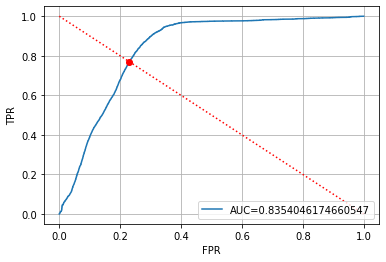

In [91]:
threshold=ROC(y_test,y_pred)